In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
df = pd.read_csv('../data/heart_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [113]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.614458,246.060241,0.149096,0.529367,149.235693,0.334337,1.064232,1.388554,0.748494,2.321536,0.520331
std,9.071150,0.461519,1.029854,17.514997,51.627522,0.356318,0.527220,22.975286,0.471936,1.171519,0.617203,1.028603,0.618543,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


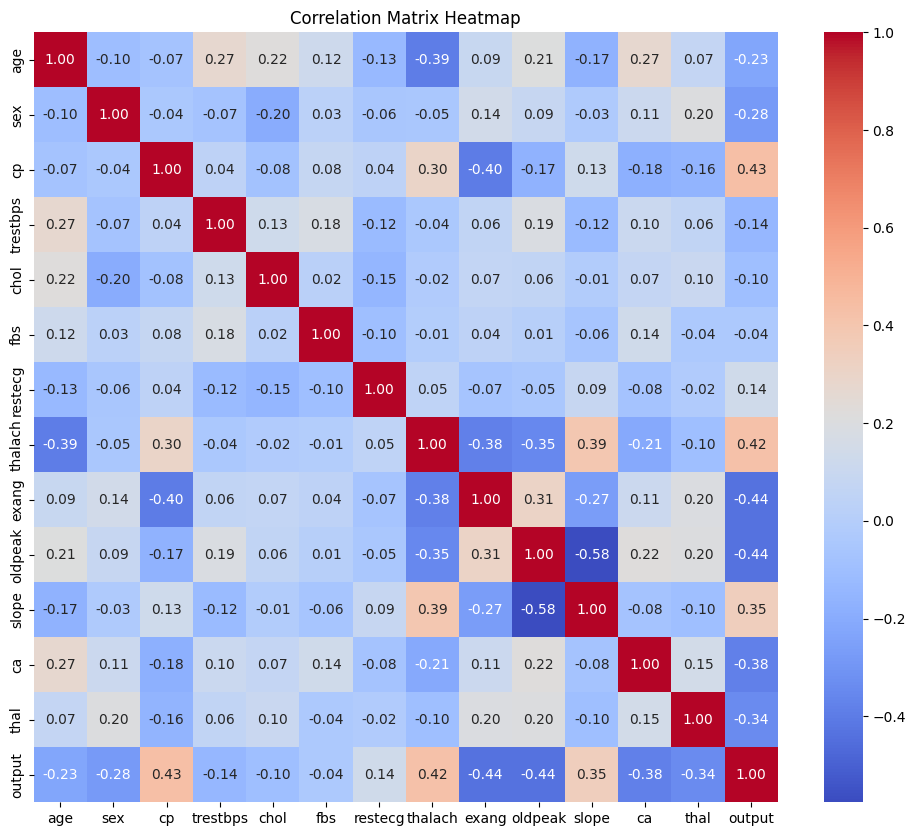

In [114]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


               age       sex        cp  trestbps   thalach     exang  \
age            NaN       NaN       NaN  0.272997 -0.392120       NaN   
sex            NaN       NaN       NaN       NaN       NaN       NaN   
cp             NaN       NaN       NaN       NaN  0.304387 -0.399920   
trestbps  0.272997       NaN       NaN       NaN       NaN       NaN   
thalach  -0.392120       NaN  0.304387       NaN       NaN -0.380002   
exang          NaN       NaN -0.399920       NaN -0.380002       NaN   
oldpeak        NaN       NaN       NaN       NaN -0.348605  0.305832   
slope          NaN       NaN       NaN       NaN  0.393433 -0.265228   
ca        0.272647       NaN       NaN       NaN       NaN       NaN   
thal           NaN       NaN       NaN       NaN       NaN       NaN   
output         NaN -0.280008  0.434704       NaN  0.422724 -0.437802   

           oldpeak     slope        ca      thal    output  
age            NaN       NaN  0.272647       NaN       NaN  
sex          

In [115]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr().abs()

# Trouver les couples de labels avec une corrélation absolue de plus de 25%
threshold = 0.30
high_correlation_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j]) 
                          for i in range(len(correlation_matrix.columns)) 
                          for j in range(i+1, len(correlation_matrix.columns)) 
                          if correlation_matrix.iloc[i, j] > threshold]

high_correlation_pairs

[('age', 'thalach'),
 ('cp', 'thalach'),
 ('cp', 'exang'),
 ('cp', 'output'),
 ('thalach', 'exang'),
 ('thalach', 'oldpeak'),
 ('thalach', 'slope'),
 ('thalach', 'output'),
 ('exang', 'oldpeak'),
 ('exang', 'output'),
 ('oldpeak', 'slope'),
 ('oldpeak', 'output'),
 ('slope', 'output'),
 ('ca', 'output'),
 ('thal', 'output')]

In [116]:
bins = []

for i in range(df['age'].min(), df['age'].max(), 5):
    bins.append(i)

df['age_bin'] = pd.cut(df['age'], bins)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output,age_bin
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"(49, 54]"
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"(49, 54]"
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(69, 74]"
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"(59, 64]"
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"(59, 64]"


In [117]:
dict_keys = df['age_bin'].unique().tolist()

age_thalach_dict = {}

for age_bin in dict_keys:
    age_thalach_dict[age_bin] = df[df['age_bin'] == age_bin]['thalach'].tolist()

age_thalach_dict

{Interval(49.0, 54.0, closed='right'): [168,
  155,
  116,
  122,
  156,
  142,
  109,
  162,
  162,
  163,
  125,
  147,
  152,
  158,
  158,
  163,
  167,
  95,
  156,
  190,
  173,
  108,
  111,
  156,
  152,
  169,
  149,
  163,
  156,
  157,
  178,
  195,
  147,
  156,
  147,
  143,
  126,
  126,
  178,
  128,
  116,
  186,
  165,
  184,
  159,
  166,
  195,
  165,
  95,
  108,
  169,
  172,
  154,
  169,
  115,
  143,
  195,
  115,
  158,
  152,
  162,
  128,
  167,
  126,
  115,
  173,
  173,
  123,
  158,
  190,
  123,
  123,
  152,
  169,
  142,
  163,
  184,
  173,
  157,
  160,
  186,
  190,
  142,
  122,
  159,
  166,
  160,
  159,
  108,
  149,
  160,
  167,
  158,
  172,
  152,
  157,
  116,
  152,
  160,
  159,
  163,
  170,
  178,
  116,
  142,
  158,
  168,
  143,
  128,
  168,
  147,
  156,
  170,
  155,
  158,
  154,
  125,
  147,
  160,
  154,
  156,
  163,
  161,
  143,
  149,
  143,
  95,
  165,
  122,
  126,
  126,
  160,
  111,
  154,
  158,
  155,
  160,
  109,

In [124]:
def create_correlation_dict(df, column1, column2, nb_bins=9):
    key_column, value_column = (column2, column1) if df[column1].max() - df[column1].min() > df[column2].max() - df[column2].min() else (column1, column2)
    sz_bins = (df[key_column].max() - df[key_column].min()) / nb_bins
    bins = []
    
    for i in range(nb_bins + 1):
        bins.append(i*sz_bins + df[key_column].min() )
        
    print(bins)
    df[key_column + '_bin'] = pd.cut(df[key_column], bins)

    return df
    
prout = create_correlation_dict(df, 'age', 'thalach', 10)

[np.float64(29.0), np.float64(33.8), np.float64(38.6), np.float64(43.4), np.float64(48.2), np.float64(53.0), np.float64(57.8), np.float64(62.6), np.float64(67.4), np.float64(72.19999999999999), np.float64(77.0)]


In [125]:
prout = create_correlation_dict(df, 'cp', 'thalach', 4)
prout

[np.float64(0.0), np.float64(0.75), np.float64(1.5), np.float64(2.25), np.float64(3.0)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output,age_bin,cp_bin
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"(48.2, 53.0]",NaN
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"(48.2, 53.0]",NaN
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(67.4, 72.2]",NaN
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"(57.8, 62.6]",NaN
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"(57.8, 62.6]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,"(53.0, 57.8]",NaN
1324,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,"(43.4, 48.2]","(2.25, 3.0]"
1325,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,"(67.4, 72.2]",NaN
1326,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,"(53.0, 57.8]",NaN
